## k-Means Clustering

As we described earlier, *clustering* is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

*k-means* clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes. 

The following example illustrates the algorithm on a synthetic dataset:

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

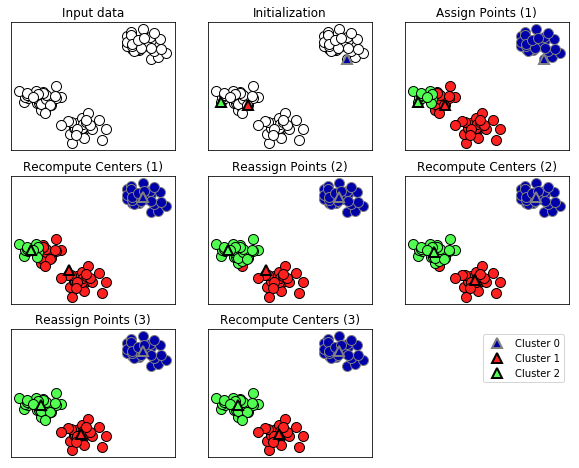

In [2]:
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points randomly as cluster centers (see “Initialization”). Then the iterative algorithm starts. 

First, each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). 

Next, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”). Then the process is repeated two more times. 

After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.

Given new data points, *k-means* will assign each to the closest cluster center. The next example shows the boundaries of the cluster centers that were learned:

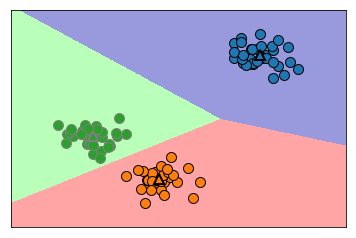

In [3]:
mglearn.plots.plot_kmeans_boundaries()

Applying *k-means* with scikit-learn is quite straightforward.  Here, we apply it to the synthetic data that we used for the preceding plots.  We instantiate the *KMeans* class, and set the number of clusters we are looking for.  Then, we call the *fit* method with the data.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# Build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

During the algorithm, each training data point in *X* is assigned a cluster label.  You can find these labels in the *kmeans.labels_* attribute.

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


As we asked for 3 clusters, the clusters are numbered 0 to 2.

You can also assign cluster labels to new points, using the *predict* method.  Each new point is assigned to the closest cluster center when predicting, but the existing model is not changed.  Running *predict* on the training set returns the same result as *labels_*:

In [6]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


You can see that clustering is somewhat similar to classification, in that each item gets a label. However, there is no ground truth, and consequently the labels themselves have no a priori meaning. 

Let’s go back to the example of clustering face images that we discussed before. It might be that the cluster 3 found by the algorithm contains only faces of your friend Bela. You can only know that after you look at the pictures, though, and the number 3 is arbitrary. The only information the algorithm gives you is that all faces labeled as 3 are similar.

For the clustering we just computed on the two-dimensional toy dataset, that means that we should not assign any significance to the fact that one group was labeled 0 and another one was labeled 1. Running the algorithm again might result in a different numbering of clusters because of the random nature of the initialization.

Here is a plot of this data again. The cluster centers are stored in the *cluster_centers_* attribute, and we plot them as triangles:

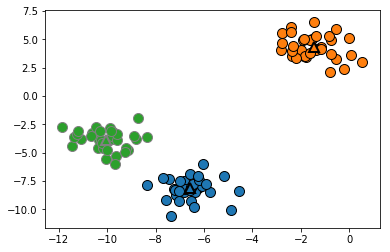

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

We can also use more or fewer cluster centers.

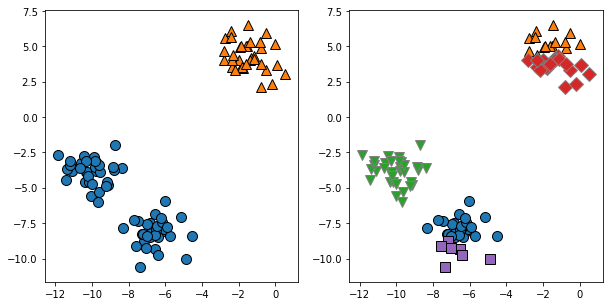

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# Using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### Failure Cases of K-Means

Even if you know the “right” number of clusters for a given dataset, k-means might not always be able to recover them. Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, k-means can only capture relatively simple shapes. k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. 

That can sometimes lead to surprising results, as shown here:

Text(0, 0.5, 'Feature 1')

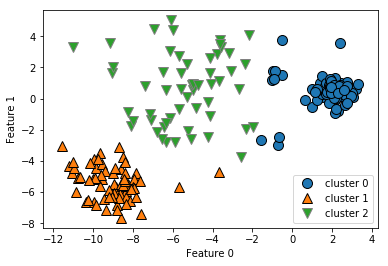

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. Instead, both cluster 0 and cluster 1 have some points that are far away from all the other points in these clusters that “reach” toward the center.

k-means also assumes that all directions are equally important for each cluster. The following plot (Figure 3-28) shows a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data:

Text(0, 0.5, 'Feature 1')

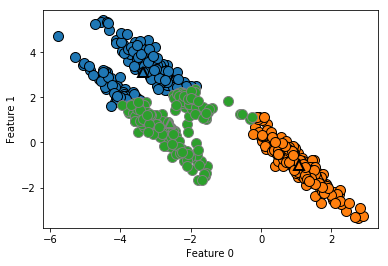

In [10]:
# Generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# Transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

*k-means* also performs poorly if the clusters have more complex shapes, like the two_moons data we encountered in Chapter 2:

Text(0, 0.5, 'Feature 1')

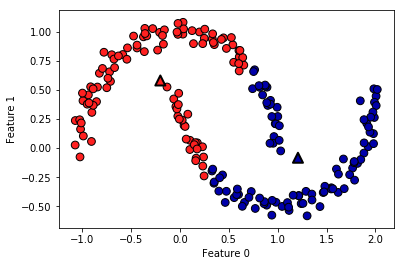

In [11]:
# Generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, we would hope that the clustering algorithm can discover the two half-moon shapes. However, this is not possible using the k-means algorithm.